# Geometric interpretation of PCA


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Define the unit vector
$\mathbf{v}_1 = \begin{pmatrix} \cos(\theta_1) \\ \sin(\theta_1)\end{pmatrix}$
where $\theta = \pi/6$ and a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$.


In [3]:
theta1 = np.pi / 6
# v2 must be orthogonal to v1
theta2 = theta1 + np.pi / 2

v1 = np.array((np.cos(theta1), np.sin(theta1)))
v2 = np.array((np.cos(theta2), np.sin(theta2)))
v1, v2

(array([0.8660254, 0.5      ]), array([-0.5      ,  0.8660254]))

Define the point $\mathbf{b} = \begin{pmatrix} 20 \\ 30\end{pmatrix}$


In [4]:
b = np.array((20, 30))
b

array([20, 30])

Generate $n = 1000$ points $\mathbf{x}_i$ according to the formula:

$\mathbf{x}_i = \mathbf{b} + r_{1,i} \rho_1 \mathbf{v}_1 + r_{2,i} \rho_2 \mathbf{v}_2$

where $\rho_1 = 12$, $\rho_2 = 3$ and the $r_{i,j}$ are real numbers independently generated according to a normal distribution.


In [5]:
n_points = 1000
rho1 = 12
rho2 = 3

# random matrix of two rows of n_points (these are r_i and r_j)
seeds = np.random.randn(2, n_points)
X = b[:, None] + rho1 * np.outer(v1, seeds[0, :]) + rho2 * np.outer(v2, seeds[1, :])

X.shape

(2, 1000)

Plot the generated numbers in a plane, showing the directions $\mathbf{v}_1$ and $\mathbf{v}_2$, rescaled by $\rho_1$ and $\rho_2$, respectivaly.


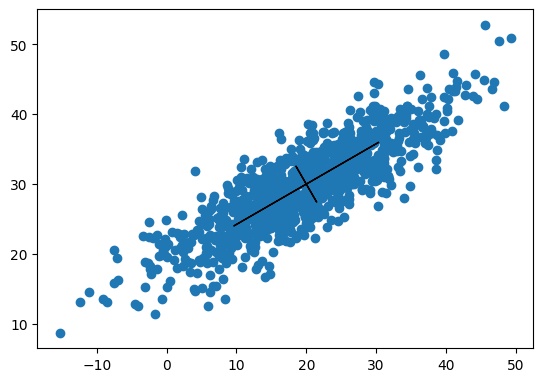

In [6]:
fig, ax = plt.subplots(1, 1)

ax.scatter(X[0, :], X[1, :])
ax.arrow(b[0] - v1[0] * rho1, b[1] - v1[1] * rho1, 2 * v1[0] * rho1, 2 * v1[1] * rho1)
ax.arrow(b[0] - v2[0] * rho2, b[1] - v2[1] * rho2, 2 * v2[0] * rho2, 2 * v2[1] * rho2)
ax.set_aspect("equal")

Perform PCA on the matrix $X$:

$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$

$\overline{X} = U \Sigma V^T$


$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$


In [7]:
# compute sample mean
# mu = np.array((np.sum(X[0, :]) / n_points, np.sum(X[1, :]) / n_points))

mu = np.mean(X, axis=1)
mu

array([19.63262962, 29.78953799])

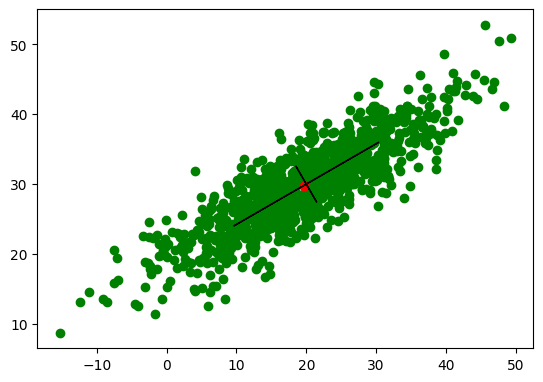

In [8]:
fig, ax = plt.subplots(1, 1)

ax.scatter(X[0, :], X[1, :], c="g")
ax.scatter(mu[0], mu[1], c="r")
ax.arrow(b[0] - v1[0] * rho1, b[1] - v1[1] * rho1, 2 * v1[0] * rho1, 2 * v1[1] * rho1)
ax.arrow(b[0] - v2[0] * rho2, b[1] - v2[1] * rho2, 2 * v2[0] * rho2, 2 * v2[1] * rho2)
ax.set_aspect("equal")

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$


In [9]:
Xbar = X - np.outer(mu, np.ones((1, 1000)))
Xbar.shape

(2, 1000)

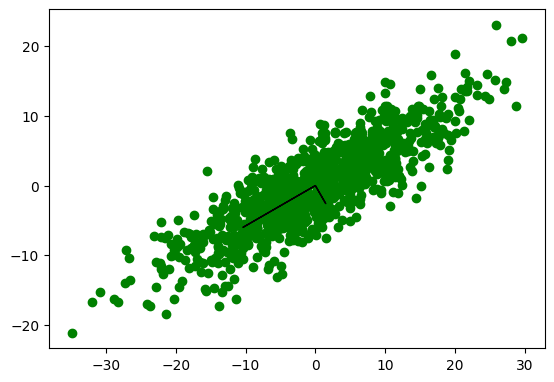

In [10]:
fig, ax = plt.subplots(1, 1)

ax.scatter(Xbar[0, :], Xbar[1, :], c="g")
ax.arrow(-v1[0] * rho1, -v1[1] * rho1, v1[0] * rho1, v1[1] * rho1)
ax.arrow(-v2[0] * rho2, -v2[1] * rho2, v2[0] * rho2, v2[1] * rho2)
ax.set_aspect("equal")

$\overline{X} = U \Sigma V^T$


In [11]:
U, s, VT = np.linalg.svd(Xbar, full_matrices=False)
U, s, VT

(array([[-0.86388443, -0.50369007],
        [-0.50369007,  0.86388443]]),
 array([366.75357444,  93.86369037]),
 array([[ 0.00101094, -0.00101951,  0.02418107, ..., -0.00835579,
         -0.01228963, -0.09890726],
        [ 0.01001721, -0.0429861 , -0.01417236, ...,  0.02710824,
         -0.02381282,  0.03548374]]))

Plot the first two singular vectors, rescaled by the root of the sample variance:

${\sqrt{\frac{\sigma_1^2}{(n - 1)}}}{\mathbf{u}_1}, {\sqrt{\frac{\sigma_2^2}{(n - 1)}}}{\mathbf{u}_2}$


11.603569588470892
2.969715740833059


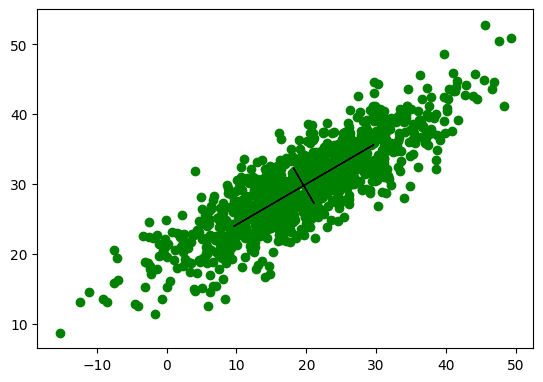

In [12]:
u1 = U[:, 0]
u2 = U[:, 1]

sample_variance = s / np.sqrt(n_points - 1)
print(sample_variance[0])
print(sample_variance[1])

fig, ax = plt.subplots(1, 1)

ax.scatter(X[0, :], X[1, :], c="g")
ax.arrow(
    mu[0] - u1[0] * sample_variance[0],
    mu[1] - u1[1] * sample_variance[0],
    2 * u1[0] * sample_variance[0],
    2 * u1[1] * sample_variance[0],
)
ax.arrow(
    mu[0] - u2[0] * sample_variance[1],
    mu[1] - u2[1] * sample_variance[1],
    2 * u2[0] * sample_variance[1],
    2 * u2[1] * sample_variance[1],
)
ax.set_aspect("equal")

Compute the principal components of the data:

$\Phi = U^T \overline{X}$


In [15]:
PHI = U.T @ Xbar

Make a scatterplot of the two first principal components ($\phi_1$, $\phi_2$)


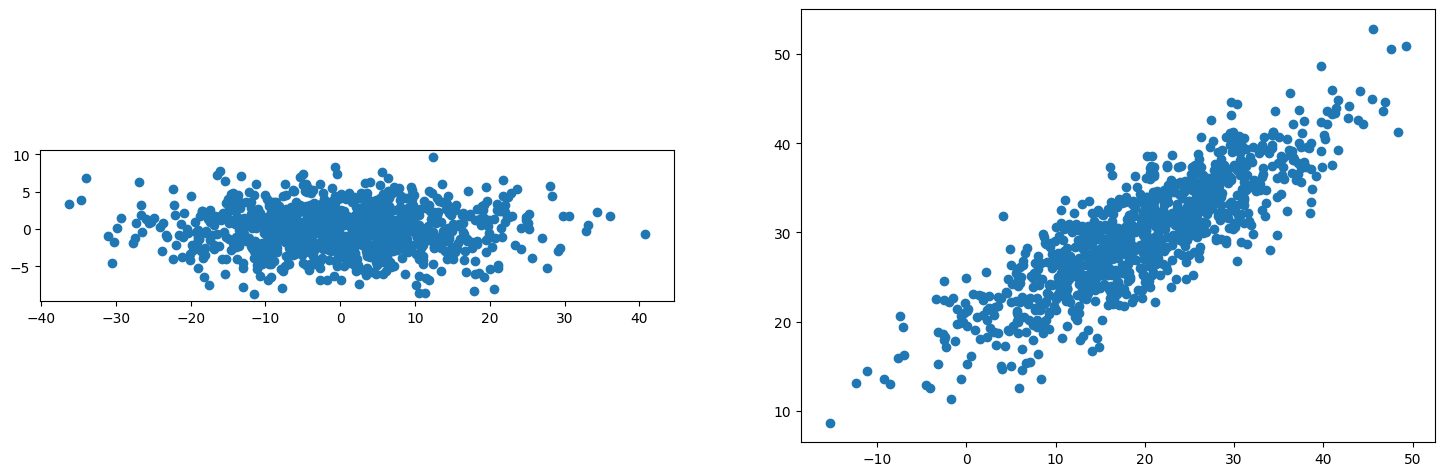

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18, 9))

ax[0].scatter(PHI[0, :], PHI[1, :])
ax[1].scatter(X[0, :], X[1, :])
ax[0].set_aspect("equal")
ax[1].set_aspect("equal")